<a href="https://colab.research.google.com/github/ssuzana/Machine-Learning-Notebooks/blob/main/Data%20Exploration%20and%20Visualization/Movie%20Budgets%20and%20Financial%20Performance/Movie_Budgets_and_Financial_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Do higher film budgets lead to more box office revenue?

Let's find out if there's a relationship using the movie budgets and financial performance data scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 


# Import Statements

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [40]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [41]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

We answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [42]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [43]:
data.shape

(5391, 6)

[DataFrame.isna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html#pandas.DataFrame.isna)

Detect missing values.

In [44]:
data.isna().any()

Rank                     False
Release_Date             False
Movie_Title              False
USD_Production_Budget    False
USD_Worldwide_Gross      False
USD_Domestic_Gross       False
dtype: bool

[DataFrame.duplicated([subset, keep])](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html#pandas.DataFrame.duplicated)

Return boolean Series denoting duplicate rows.

In [45]:
len(data[data.duplicated()])

0

In [46]:
data[data.duplicated(["Movie_Title", "Release_Date"])]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3055,5290,12/31/2007,A Dog's Breakfast,"$120,000",$0,$0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

We convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [48]:
cols = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']

for col in cols:
  data[col] = data[col].str.replace('$', "", regex=True)
  data[col] = data[col].str.replace(',', "", regex=True)
  # Convert column to a numeric data type
  data[col] = pd.to_numeric(data[col])

In [49]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In [50]:
type(data.USD_Production_Budget.get(0))

numpy.int64

We convert the `Release_Date` column to a Pandas Datetime type. 

In [51]:
data.Release_Date = pd.to_datetime(data.Release_Date)
type(data.Release_Date.values[0])

numpy.datetime64

### Descriptive Statistics

In [52]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


We'll answer these questions:

1. What is the average production budget of the films in the data set?
`$31,113,737.58`
2. What is the average worldwide gross revenue of films? `$88,855,421.96`

 The average film costs about `$31m` to make and makes around three times that (or `~$89m`) in worldwide revenue.

3. What were the minimums for worldwide and domestic revenue? 
 
 The minimum domestic and worldwide revenue is `$0`. If a movie never gets screened or is cancelled, then this is the number we would expect to see here.

4. Are the bottom 25% of films actually profitable or do they lose money?

 All the movies in the bottom quartile lose money, since the average cost is `$5m` and they only bring in `$3.8m` in worldwide revenue.

5. What are the highest production budget and highest worldwide gross revenue of any film?
 
 The highest production budget was `$425,000,000` and the highest worldwide revenue was `$2,783,918,982`. `$2.7` billion revenue! 

6. Which film was the lowest budget film in the dataset?

In [53]:
data[data.USD_Production_Budget == data.USD_Production_Budget.min()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


7. Which film was the highest budget film in the dataset?

In [54]:
data[data.USD_Production_Budget == data.USD_Production_Budget.max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


# Investigating the Zero Revenue Films

How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [55]:
zero_domestic_revenue = data[data.USD_Domestic_Gross == 0]
print(len(zero_domestic_revenue))

512


In [56]:
zero_domestic_revenue.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


**Observations.** We see that there are 512 films in the dataset that had no revenue in the United States. However, the highest budget films with no revenue have a release date AFTER the date on which the dataset was compiled (May 1st, 2018).

How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [57]:
zero_worldwide_revenue = data[data.USD_Worldwide_Gross == 0]
print(len(zero_worldwide_revenue))

357


In [58]:
zero_worldwide_revenue.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


**Observations.** We see that there are 357 films that made no money internationally. Once again, some of the films have not been released yet at the time the data was compiled. However, 512 versus 357. Why is there a difference? 

Some international films were never screened in the United States.  In fact, let's look at an example of this: "Don Gato, el inicio de la pandilla" made about `$4.5` million dollars in the box office, but nothing in the United States. Perhaps they should have screened it there too, considering it cost `$80` million to make!

In [59]:
data[data.Movie_Title == "Don Gato, el inicio de la pandilla"]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0


We create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

In [60]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & 
                                  (data.USD_Worldwide_Gross != 0)]
international_releases                                  

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


We can use the Pandas [.query()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) function to accomplish the same thing.

In [61]:
data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


### Unreleased Films


 We'll identify which films were not released yet as of the time of data collection (May 1st, 2018)and create another DataFrame called `data_clean` that does not include these movies.

In [62]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [63]:
unreleased_movies = data.loc[data.Release_Date > scrape_date]
unreleased_movies

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [64]:
data_clean = data.drop(unreleased_movies.index)
len(data_clean.loc[data_clean.Release_Date > scrape_date])

0

### Films that Lost Money

What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [65]:
money_losing = data_clean.loc[data_clean.USD_Production_Budget	 > data_clean.USD_Worldwide_Gross]
print(round(len(money_losing)/len(data_clean),4)*100, '%')

37.28 %


# Seaborn for Data Viz

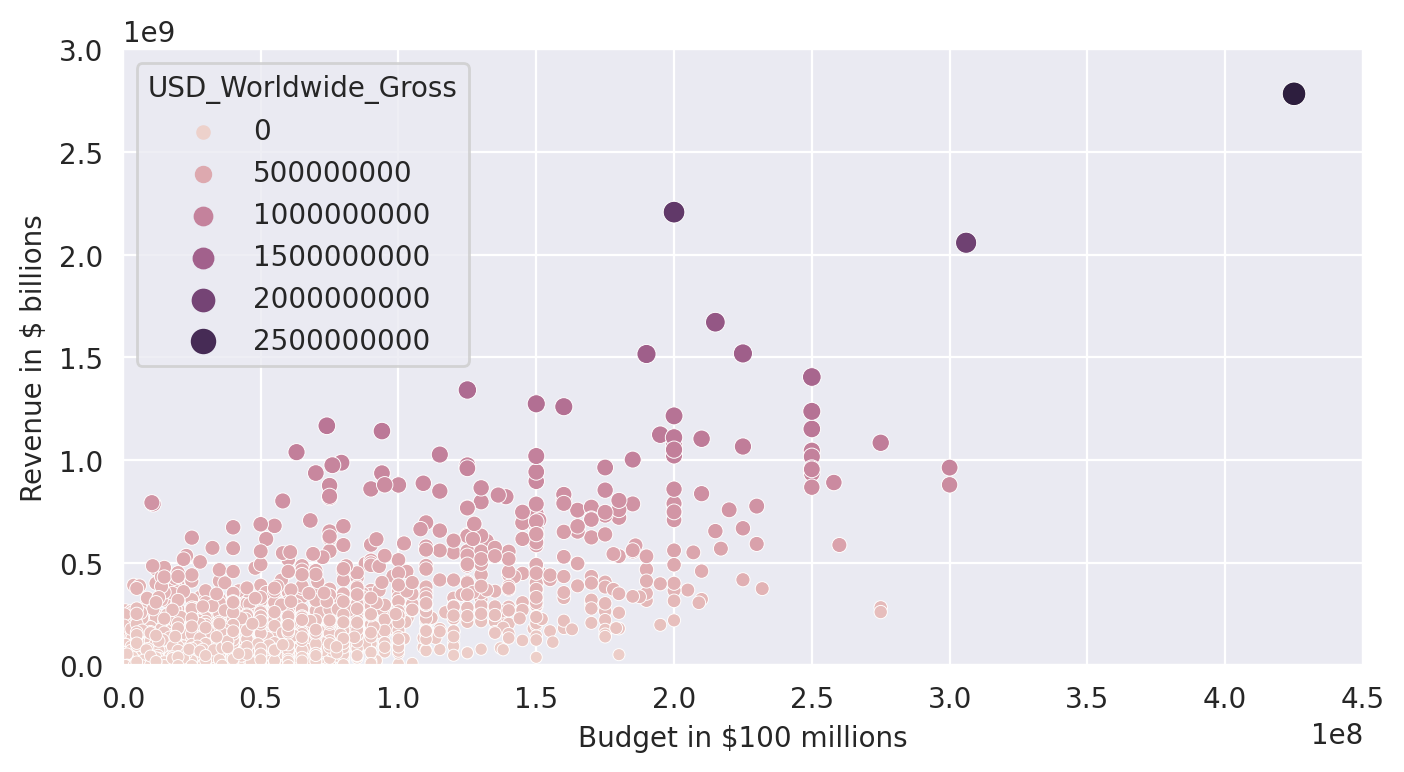

In [66]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross',
                       )
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')


### Plotting Movie Budgets over Time





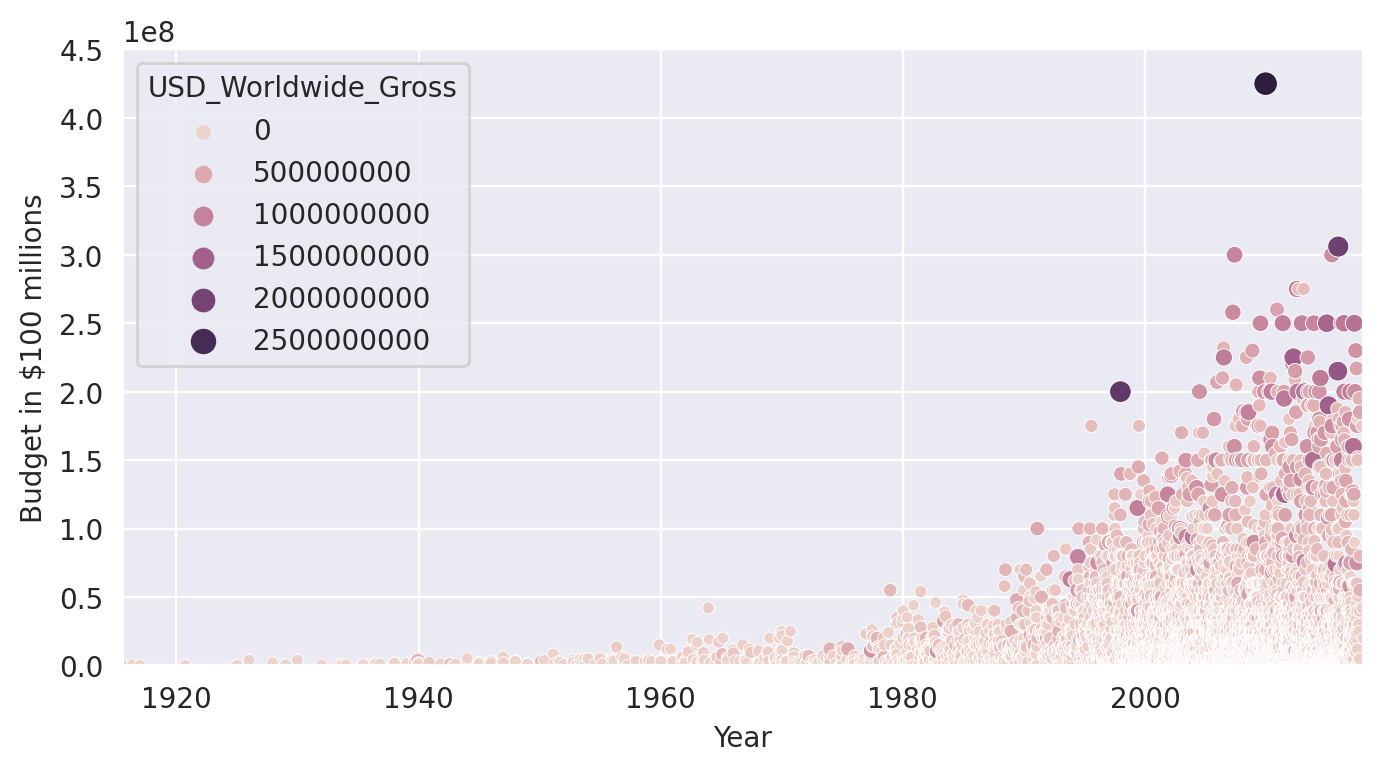

In [67]:
plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style("darkgrid"):
  ax = sns.scatterplot(data=data_clean,
                       x="Release_Date",
                       y="USD_Production_Budget",
                       hue="USD_Worldwide_Gross",
                       size="USD_Worldwide_Gross",
                       )
  
  ax.set(xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
         ylim=(0, 450000000),
         xlabel="Year",
         ylabel="Budget in $100 millions",
        )
  
plt.show()

**Observations.**

Movie budgets have just exploded in the last 40 years or so. Up until the 1970s, the film industry appears to have been in an entirely different era. Budgets started growing fast from the 1980s onwards and continued to grow through the 2000s. Also, the industry has grown massively, producing many more films than before. The number of data points is so dense from 2000 onwards that they are overlapping.

# Converting Years to Decades 

We create a column in `data_clean` that has the decade of the release. 


In [68]:
years = pd.DatetimeIndex(data_clean.Release_Date).year
years

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)

In [69]:
decades = 10 * (years // 10)
decades

Int64Index([1910, 1910, 1910, 1920, 1920, 1920, 1920, 1920, 1930, 1930,
            ...
            2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
           dtype='int64', name='Release_Date', length=5384)

In [70]:
data_clean["Decade"] = decades
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Movies

We create two new DataFrames: `old_films` and `new_films`
* `old_films` include all the films before 1969 (up to and including 1969)
* `new_films` include all the films from 1970 onwards.



In [71]:
old_films = data_clean[data_clean.Decade < 1970]
old_films.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
149,3831,1969-10-24,Butch Cassidy and the Sundance Kid,6000000,102308900,102308900,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
151,3613,1969-12-18,On Her Majesty's Secret Service,8000000,82000000,22800000,1960
152,4195,1969-12-19,Topaz,4000000,6000000,6000000,1960


In [72]:
new_films = data_clean[data_clean.Decade >= 1970]
new_films.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
153,2159,1970-01-01,Waterloo,25000000,0,0,1970
154,2270,1970-01-01,Darling Lili,22000000,5000000,5000000,1970
155,3136,1970-01-01,Patton,12000000,62500000,62500000,1970
156,3277,1970-01-01,The Molly Maguires,11000000,2200000,2200000,1970
157,4265,1970-01-01,M*A*S*H,3500000,81600000,81600000,1970


We'll answer these two questions:

* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [73]:
len(old_films)

153

In [74]:
old_films[old_films.USD_Production_Budget == old_films.USD_Production_Budget.max()]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960


# Seaborn Regression Plots

We use Seaborn's [.regplot()](https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot) to visualise the relationship between the movie budget and the worldwide revenue for old films.

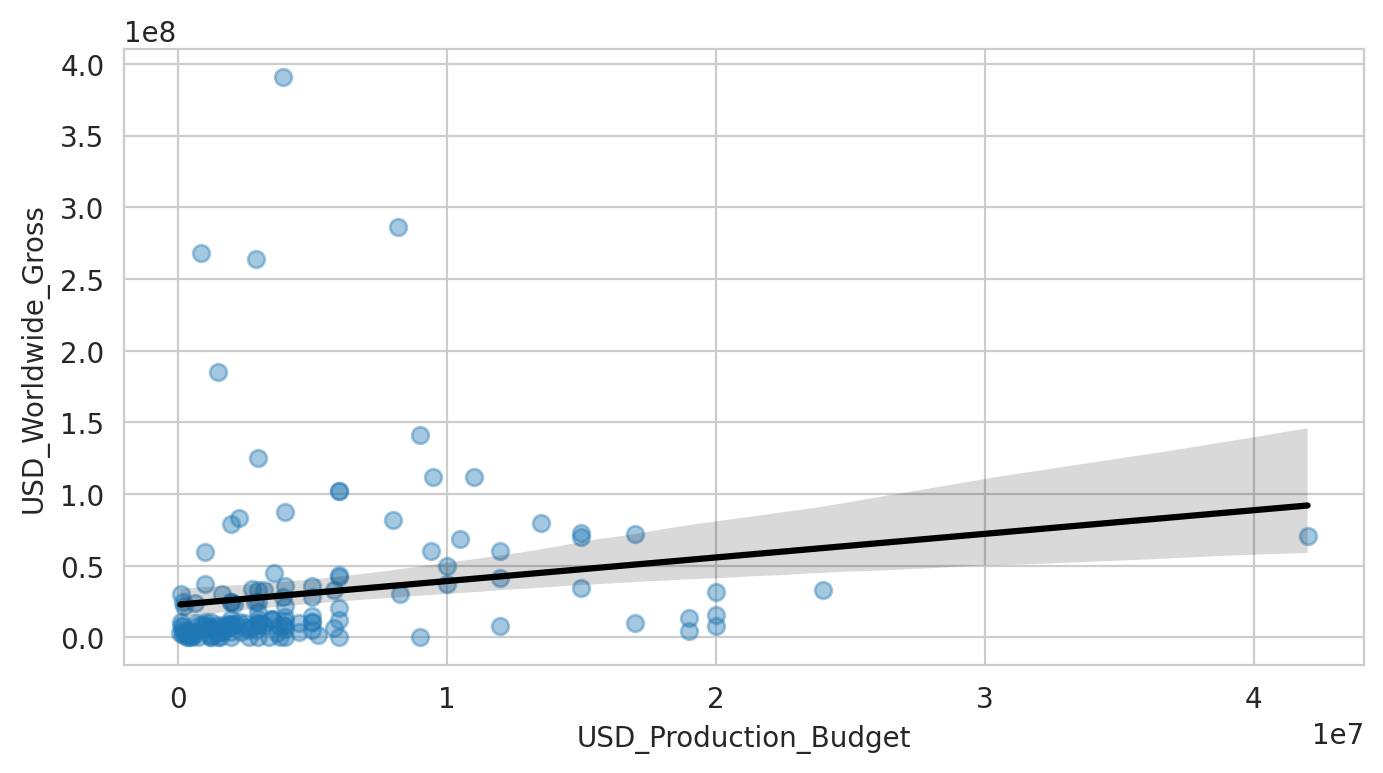

In [75]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
              x='USD_Production_Budget',
              y='USD_Worldwide_Gross',
              scatter_kws = {'alpha': 0.4},
              line_kws = {'color': 'black'});

**Observations.** We can spot Cleopatra on the far right. But also, we see that many lower budget films made much more money than Cleopatra. The relationship between the production budget and movie revenue is not very strong. Many points on the left are very far away for the line, so the line appears not to capture the relationship between budget and revenue very well at all.

But does the same hold true for the newer films?

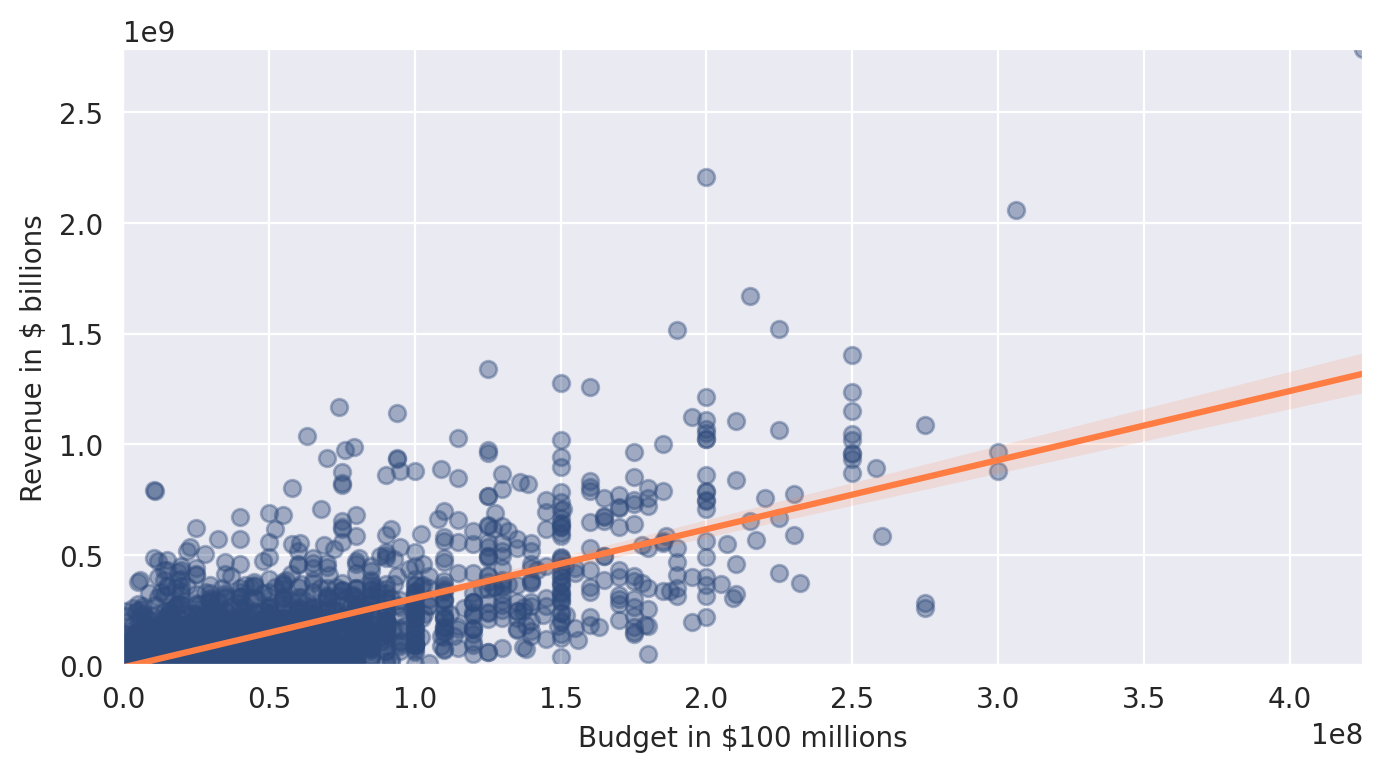

In [76]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films, 
              x='USD_Production_Budget',
              y='USD_Worldwide_Gross',
              scatter_kws = {'alpha': 0.4, 'color':'#2f4b7c'},
              line_kws = {'color': '#ff7c43'})
  ax.set(xlim=(0, data_clean.USD_Production_Budget.max()),
         ylim=(0, data_clean.USD_Worldwide_Gross.max()),
         xlabel="Budget in $100 millions",
         ylabel="Revenue in $ billions",
        );

**Observations.** This time we are getting a much better fit, compared to the old films. Also, the confidence interval is much narrower. We also see that a film with a $150 million budget is predicted to make slightly under \$500 million by our regression line.

We can be pretty confident that there does indeed seem to be a relationship between a film's budget and that film's worldwide revenue.

But how much of the variation in revenue does the budget actually explain? And how much extra revenue can we expect for an additional $1 increase in the budget? To find out, we need to dive into the numbers underlying our regression model.



# Regression with scikit-learn

We run a linear regression for the `new_films` and calculate the intercept, slope and r-squared. 

In [78]:
regression = LinearRegression()

In [83]:
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

In [84]:
regression.fit(X, y)

LinearRegression()

In [85]:
regression.intercept_

array([-8650768.00661027])

In [86]:
regression.coef_

array([[3.12259592]])

In [87]:
regression.score(X, y)

0.5577032617720403

**Observation.** We see that our r-squared comes in at around 0.558. This means that our model explains about 56% of the variance in movie revenue. That's actually pretty amazing, considering we've got the simplest possible model, with only one explanatory variable.

We now run a linear regression for the `old_films` and calculate the intercept, slope and r-squared.


In [89]:
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
regression.fit(X, y)
regression.score(X, y)

0.02937258620576877

**Observation.** The r-squared is very low. This makes sense considering how poorly our data points aligned with our line earlier.

# Use the Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ \widehat{REVENUE} = \theta _0 + \theta _1 BUDGET$$

How much global revenue does our model estimate for a film with a budget of $350 million? 

In [93]:
theta0 = regression.intercept_[0]
theta1 = regression.coef_[0,0]

In [96]:
budget = 350000000
revenue_estimate = theta0 + theta1 * budget
print(f'The estimated revenue for a $350 movie is around ${revenue_estimate:.10}')

The estimated revenue for a $350 movie is around $599521139.0
